In [1]:
#import the libraries 

import pandas as pd
from sklearn.linear_model import LogisticRegression


In [2]:
# Load the Dataset

claimants = pd.read_csv("/Users/chira/Downloads/Dataset/Dataset/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
#dropping the case number columns

claimants.drop(['CASENUM'],inplace=True,axis=1)

In [4]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [5]:
claimants.shape

(1340, 6)

In [6]:
claimants = claimants.dropna()

In [7]:
claimants.shape

(1096, 6)

In [8]:
#dividing the data into input and output 

x= claimants.iloc[:,1:]

y= claimants.iloc[:,0]


In [9]:
# Initaite Logistic Regression and fit the model 

classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [10]:
# Predicting The X dataset

y_pred = classifier.predict(x)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [11]:
y_pred = classifier.predict_proba(x)

In [12]:

y_pred

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [13]:
y_pred_df = pd.DataFrame({'actual':y,'predicted_prob':classifier.predict(x)})

In [14]:
y_pred = classifier.predict(x)

y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [15]:
# Confusion matrix for the model accuracy

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [16]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr, threshlds = roc_curve(y,classifier.predict_proba(x)[:,1])

In [18]:
auc = roc_auc_score(y,y_pred)

Text(0, 0.5, 'True positive rate')

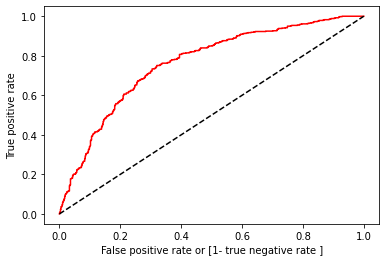

In [19]:
# Viewing results through plots

import matplotlib.pyplot as plt

plt.plot(fpr,tpr,color='red',label='logistic model ')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate or [1- true negative rate ]')
plt.ylabel('True positive rate')

In [20]:
auc

0.7108589063606365

In [23]:
import pickle
from pickle import dump

In [25]:
pickle.dump(classifier,open('logisticModel.sav','wb'))

In [26]:
from pickle import load

In [32]:
load_model = load(open('logisticModel.sav','rb'))

In [39]:
y_pred1 = load_model.predict(x)

In [40]:
# Confusion matrix for the model accuracy

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y,y_pred1)
print(confusion_matrix)

[[381 197]
 [123 395]]
